In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio

In [4]:
def load_json(group,student):
    with open(f'./data/all_json/{group}_{student}.json') as f:
        return json.load(f)
    
def load_images(group,student):
    return imageio.imread(f'./data/sequences/{group}-{student}.tif')

def show_image(group,student,frame, energy= None, threshold = None):
    plt.figure(figsize=(15,10))
    data = load_json(group,student)
    images = load_images(group,student)
    plt.imshow(images[frame-1])
    data = data['{}_{}_frame_{}'.format(group,student,frame)]
    for d in data["boxes"]:
        rect = plt.Rectangle((d[0], d[1]), d[2], d[3], fill=False, color='red')
        plt.gca().add_patch(rect)
    
    for d in data["cells"]:
        plt.plot(d[0], d[1], 'ro', markersize=2)

    if energy is not None and threshold is not None:
        for i , e in enumerate(energy):
            if e <threshold:
                plt.axvline(x=i, color='red')    
    plt.show()

In [5]:
frame_number = 60
threshold = 0.2
group = 1
student = 1


In [6]:
data = load_json(group,student)
images = load_images(group,student)

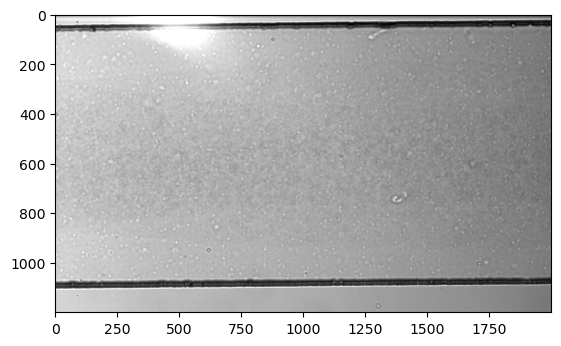

In [107]:
def back_mean(images):
    images_mean = np.mean(images,axis=3)
    background = np.mean(images_mean[:60],axis=(0))
    return background

images_mean = np.mean(images,axis=3)
background = back_mean(images)

plt.imshow(background, cmap='gray')
plt.show()

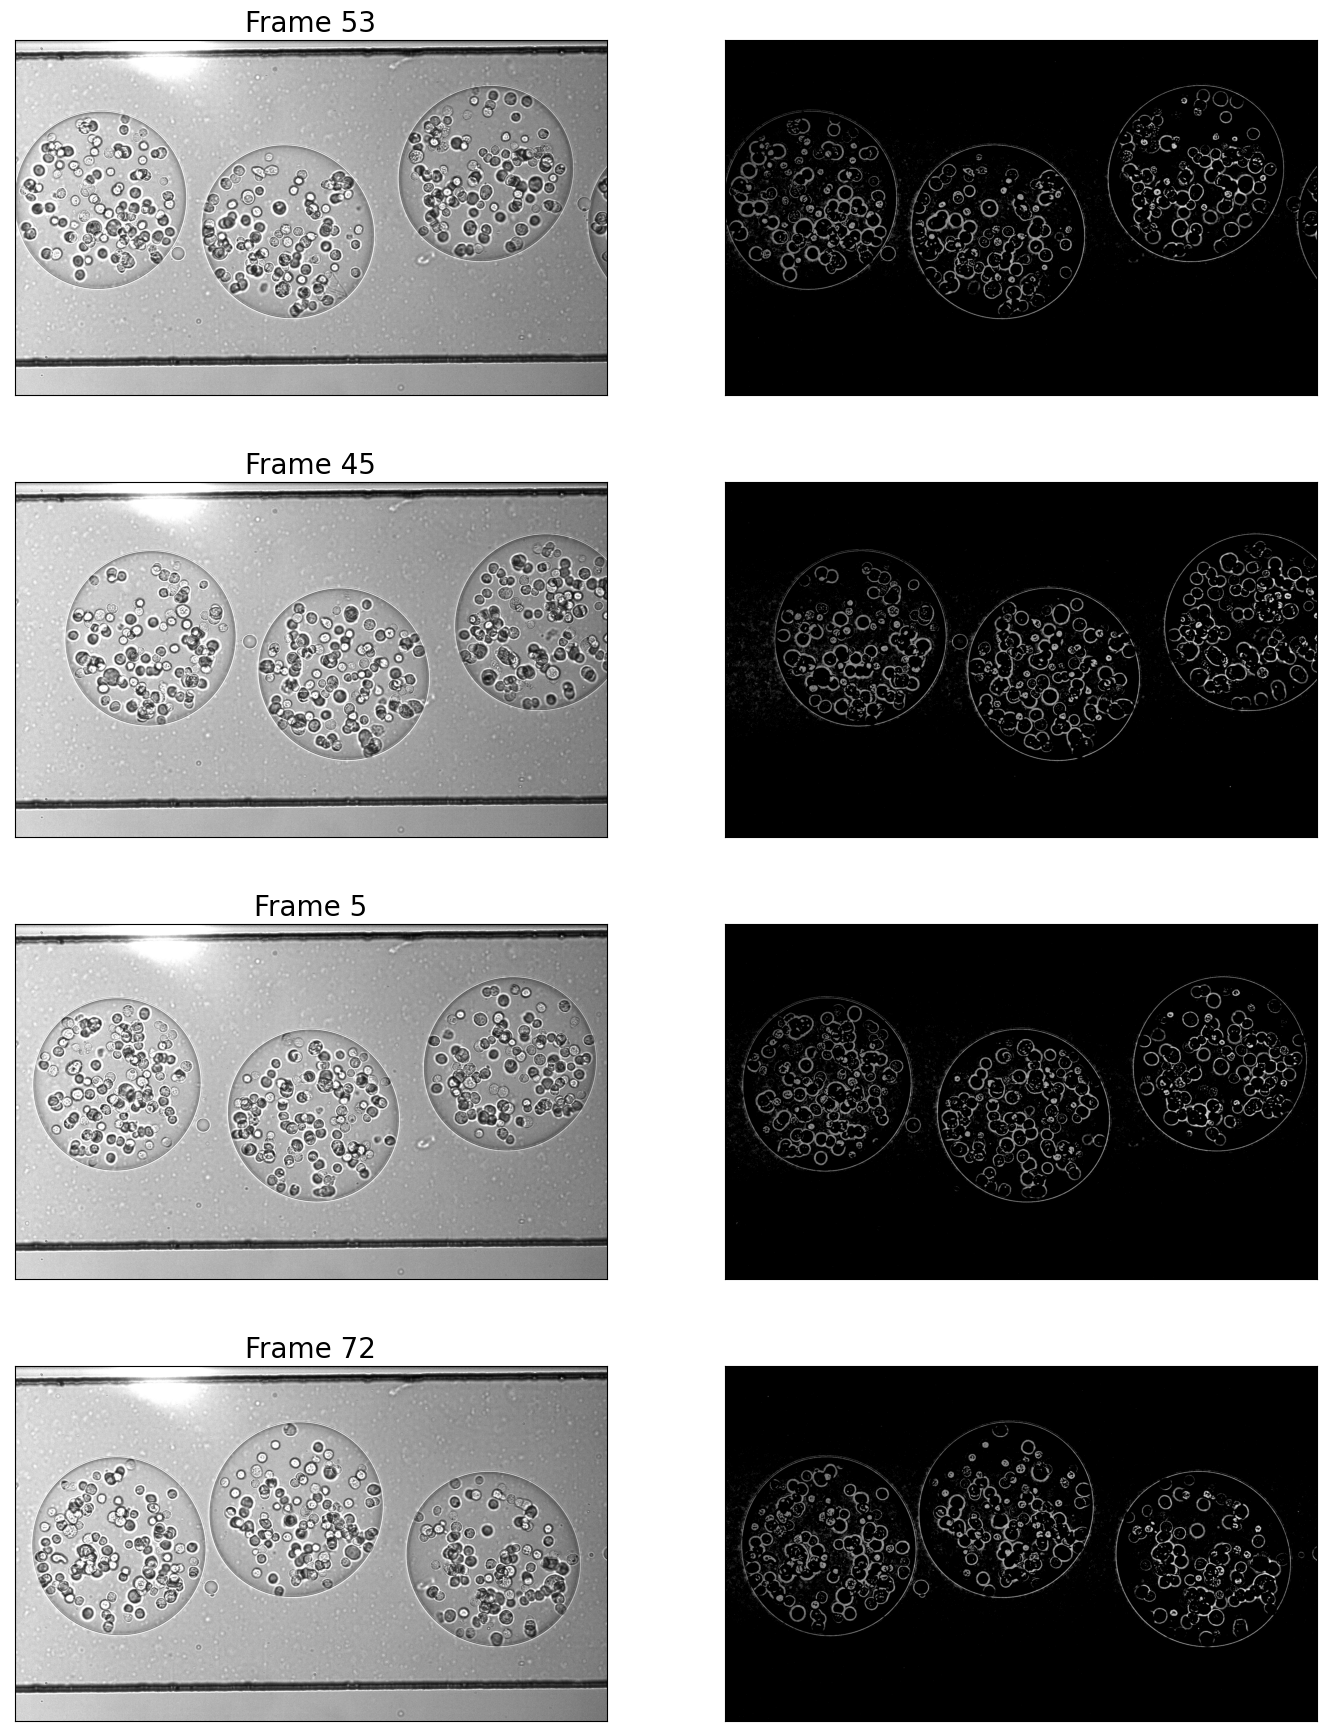

In [109]:
import scipy.signal as signal

dim = images_mean[0].shape
dim = np.array(dim)
dim = dim/dim[1]
dim = dim*7

n_test = 4
fig, axs = plt.subplots(n_test,2, figsize=(n_test * dim[0],2*(dim[1]+4)))
for i in range(0,n_test):
    frame_number = np.random.randint(0,100)
    im_raw = images_mean[frame_number]
    im_clean = im_raw - background
    im_clean = im_clean/np.max(im_clean)
    im_clean = np.where(im_clean>threshold,im_clean,0)
    conv = np.array([[0,1,0],[1,0,1],[0,1,0]])
    im_conv = signal.convolve2d(im_raw, conv, boundary='symm', mode='same')
    im_conv = signal.convolve2d(im_conv, conv, boundary='symm', mode='same')
    im_clean = np.where(im_conv>0,im_clean,0)
    axs[i,0].imshow(im_raw, cmap='gray')
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title(f'Frame {frame_number}', fontsize=20)   

    axs[i,1].imshow(im_clean, cmap='gray')
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    
plt.show()